<a href="https://colab.research.google.com/github/ramoants254/Simple-Image-Classification-Project/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Tensorflow Dependencies

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade pip
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
!pip install setuptools wheel
!pip install tensorflow-gpu==2.11.0



Num GPUs Available:  0


## Data Preprocessing

In [28]:
# Importing the Dataset
from tensorflow.keras.datasets import fashion_mnist

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [31]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [32]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [33]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [34]:
np.max(x_train),np.min(x_train)

(255, 0)

In [35]:
class_names=[' 0 Top/T-shirt',
'1 Trouser',
'2 Pullover',
'3 Dress',
'4 Coat',
'5 Sandal',
'6 Shirt',
'7 Sneaker',
'8 Bag',
'9 Ankle boot']
print(class_names)

[' 0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [36]:
np.max(y_train)

9

In [37]:
np.min(y_train)

0

## Data Exploration

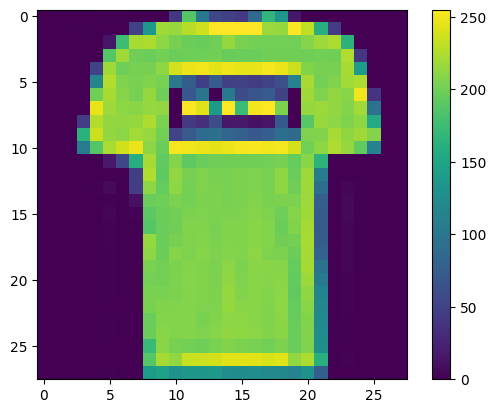

In [38]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [39]:
y_train[1]

0

In [40]:
#Normalizing the dataset
x_train=x_train/255.0
x_test=x_test/255.0

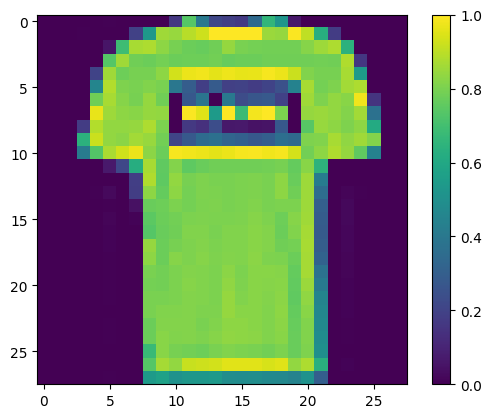

In [41]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [42]:
#flattening the dataset
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [43]:
x_test.shape,x_train.shape

((10000, 784), (60000, 784))

## Building the Model

In [44]:
model=tf.keras.models.Sequential()

In [45]:
model.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=(784,)))

In [46]:
model.add(tf.keras.layers.Dropout(0.3))

In [47]:
# Adding Output Layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

# Training the model

In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.5504 - sparse_categorical_accuracy: 0.8052
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4190 - sparse_categorical_accuracy: 0.8482
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3865 - sparse_categorical_accuracy: 0.8590
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3640 - sparse_categorical_accuracy: 0.8666
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3524 - sparse_categorical_accuracy: 0.8702
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3387 - sparse_categorical_accuracy: 0.8748
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3287 - sparse_categorical_accuracy: 0.8788
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3230 - sparse_categorical_accuracy: 0.8803
Epoch 9/10
1875/1875 [=======

## Model Evaluation and Prediction

In [57]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3503 - sparse_categorical_accuracy: 0.8798


In [58]:
test_accuracy,test_loss

(0.879800021648407, 0.3502596616744995)

## Model Prediction

In [60]:
# Get the predictions
y_pred = model.predict(x_test)
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 [==============================] - 1s 2ms/step


In [61]:
print(y_pred_classes)

[9 2 1 ... 8 1 5]


In [62]:
y_pred_classes[0]

9

In [63]:
y_test[0]

9

## Evaluating the Model

In [64]:
# Confution Metrics and Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score

In [65]:
cm=confusion_matrix(y_test,y_pred_classes)
cm

array([[828,   0,  10,  58,   4,   1,  91,   0,   8,   0],
       [  2, 966,   0,  24,   3,   0,   4,   0,   1,   0],
       [ 17,   1, 782,  20,  72,   0, 107,   0,   1,   0],
       [ 11,   6,   6, 942,   8,   0,  23,   0,   4,   0],
       [  0,   1, 104,  67, 730,   0,  94,   0,   4,   0],
       [  0,   0,   0,   0,   0, 945,   0,  35,   0,  20],
       [124,   0,  63,  47,  50,   1, 706,   0,   9,   0],
       [  0,   0,   0,   0,   0,   8,   0, 974,   0,  18],
       [  1,   0,   5,   5,   1,   4,   5,   5, 974,   0],
       [  1,   0,   0,   0,   0,   6,   0,  42,   0, 951]])

In [66]:
ac=accuracy_score(y_test,y_pred_classes)
ac

0.8798